# Machine Learning and NLP Exercises #

## Introduction ##

We will be using the same review data set from Kaggle from Week 2 for this exercise. The product we'll focus on this time is a cappuccino cup. The goal of this week is to not only preprocess the data, but to classify reviews as positive or negative based on the review text.

The following code will help you load in the data.

In [1]:
import nltk
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/coffee.csv')
data.head()

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,5,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,2,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,1,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,1,It's a powdered drink. No filter in k-cup.<br ...


for target in data.iloc[:, -2].unique():
    sep[target] = data.loc[data.iloc[:, -2] == target]

## Question 1 ##

* Determine how many reviews there are in total.
* Determine the percent of 1, 2, 3, 4 and 5 star reviews.
* Create a new data set for modeling with the following columns:
     - Column 1: 'positive' if review = 4 or 5, and 'negative' if review = 1 or 2
     - Column 2: review text
* Take a look at the number of positive and negative reviews in the newly created data set.

Checkpoint: the resulting data set should have 514 reviews.

Use the preprocessing code below to clean the reviews data before moving on to modeling.

In [3]:
print("Number of reviews: {}".format(data.shape[0]))

Number of reviews: 542


In [4]:
#percentage of 1, 2, 3, 4, 5 star reviews 
print("% of reviews")
data.stars.value_counts(normalize=True)

% of reviews


5    0.568266
1    0.177122
4    0.119926
2    0.083026
3    0.051661
Name: stars, dtype: float64

In [5]:
#new dataframe of review != 3, with stars negative or postive
df = data.loc[data.stars != 3]
df.stars = df.stars.apply(lambda x: 'positive' if x >= 4 else 'negative')

In [6]:
#number of positive and negative reviews
df.stars.value_counts()

positive    373
negative    141
Name: stars, dtype: int64

In [7]:
df.head()

,user_id,stars,reviews
0,A2XP9IN4JOMROD,negative,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,positive,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,negative,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,negative,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,negative,It's a powdered drink. No filter in k-cup.<br ...


In [8]:
df.shape

(514, 3)

In [9]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

df.reviews = df.reviews.map(alphanumeric).map(punc_lower)
df.head()

,user_id,stars,reviews
0,A2XP9IN4JOMROD,negative,i wanted to love this i was even prepared for...
1,A2TS09JCXNV1VD,positive,grove square cappuccino cups were excellent t...
2,AJ3L5J7GN09SV,negative,i bought the grove square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,negative,i love my keurig and i love most of the keuri...
4,AWKN396SHAQGP,negative,it s a powdered drink no filter in k cup br ...


## Question 2 ##

Prepare the data for modeling:
* Split the data into training and test sets. You should have four sets of data - X_train, X_test, y_train, y_test

Create numerical features with Count Vectorizer. Create two document-term matrices:
* Matrix 1: Terms should be unigrams (single words), and values should be word counts (Hint: this is the Count Vectorizer default)
* Matrix 2: Terms should be unigrams and bigrams, and values should be binary values

Recommendation: Utilize Count Vectorizer's stop words function to remove stop words from the reviews text.

In [10]:
stars = {'positive': 0,
         'negative': 1}

In [11]:
df.stars = df.stars.map(stars)

In [12]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(df.reviews, df.stars, test_size=0.3, stratify=df.stars)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

#matrix 1
cv_m1 = CountVectorizer(stop_words='english')
Xtrain_m1 = cv_m1.fit_transform(Xtrain).toarray()
Xtest_m1 = cv_m1.transform(Xtest).toarray()

#matrix 2
cv_m2 = CountVectorizer(stop_words='english', ngram_range=(1, 2))
Xtrain_m2 = cv_m2.fit_transform(Xtrain).toarray()
Xtest_m2 = cv_m2.transform(Xtest).toarray()

## Question 3 ##

Use Logistic Regression to classify reviews as positive or negative. Do this for both matrices.
* Fit a Logistic Regression model on the training data
* Apply the model on the test data and calculate the following error metrics: accuracy, precision, recall, F1 score
* Optional: Visualize the confusion matrix for both models
* Compare the error metrics of the two matrices

Recommendation: Create a function to calculate the error metrics, since you'll be doing this multiple times.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

def my_classifier(model, xtrain, ytrain, xtest, ytest):
    model = model()
    model.fit(xtrain, ytrain)
    
    ypred = model.predict(xtest)
    
    #output precision, recall, f1-score, and accuracy metrics
    print(classification_report(ytest, ypred, target_names=["Positive", "Negative"]))
    print("Recall: {:.2f}".format(recall_score(ytest, ypred)))
    print("Accuracy: {:.2f}".format(accuracy_score(ytest, ypred)))
    print("Precision: {:.2f}".format(precision_score(ytest, ypred)))
    print("F1 Score: {:.2f}".format(f1_score(ytest, ypred)))
    
    # plot confusion matrix
    def _plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix",
                             cmap=plt.cm.Blues):
        if normalize:
            cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print("Confusion matrix, without normalization")
            
        plt.imshow(cm, interpolation="nearest", cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes)
        plt.yticks(tick_marks, classes)
        
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2
        for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                     verticalalignment="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=20)
        #plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        
    cm = confusion_matrix(ytest, ypred)
    np.set_printoptions(precision=2)
    
    plt.figure(figsize=(5, 5))
    _plot_confusion_matrix(cm, classes=["Positive", "Negative"])
    plt.show()

              precision    recall  f1-score   support

    Positive       0.87      0.92      0.89       112
    Negative       0.75      0.63      0.68        43

    accuracy                           0.84       155
   macro avg       0.81      0.77      0.79       155
weighted avg       0.83      0.84      0.83       155

Recall: 0.63
Accuracy: 0.84
Precision: 0.75
F1 Score: 0.68
Confusion matrix, without normalization


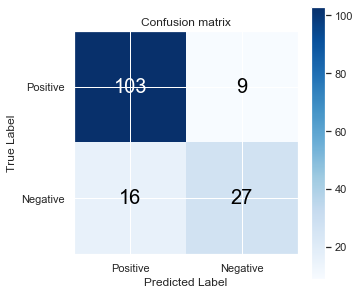

              precision    recall  f1-score   support

    Positive       0.85      0.93      0.89       112
    Negative       0.75      0.56      0.64        43

    accuracy                           0.83       155
   macro avg       0.80      0.74      0.76       155
weighted avg       0.82      0.83      0.82       155

Recall: 0.56
Accuracy: 0.83
Precision: 0.75
F1 Score: 0.64
Confusion matrix, without normalization


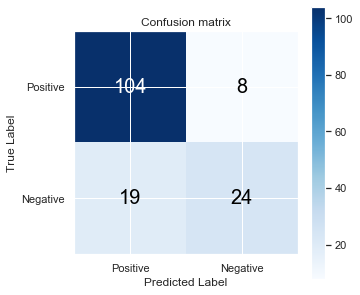

In [15]:
my_classifier(LogisticRegression, Xtrain_m1, ytrain, Xtest_m1, ytest)
my_classifier(LogisticRegression, Xtrain_m2, ytrain, Xtest_m2, ytest)

### Comments

* Working with Matrix 2, we get a higher recall for the negative class and a higher precision for the positive class than with Matrix 1. 
* The negative class is the minority class so it's good that that we can capture more negative reviews. Matrix 2 helps us do mroe of that. 

## Question 4 ##

Let's try using another machine learning technique to classify these reviews as positive or negative. Go through the exact same exercise in the previous step, except this time, use Naive Bayes instead of Logistic Regression.

For count data, use [Multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). For binary data, use [Bernoulli Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB).

Compare the results of both the Logistic Regression and Naive Bayes models.

              precision    recall  f1-score   support

    Positive       0.76      0.98      0.86       112
    Negative       0.82      0.21      0.33        43

    accuracy                           0.77       155
   macro avg       0.79      0.60      0.60       155
weighted avg       0.78      0.77      0.71       155

Recall: 0.21
Accuracy: 0.77
Precision: 0.82
F1 Score: 0.33
Confusion matrix, without normalization


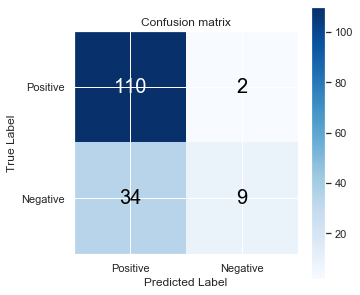

              precision    recall  f1-score   support

    Positive       0.72      1.00      0.84       112
    Negative       0.00      0.00      0.00        43

    accuracy                           0.72       155
   macro avg       0.36      0.50      0.42       155
weighted avg       0.52      0.72      0.61       155

Recall: 0.00
Accuracy: 0.72
Precision: 0.00
F1 Score: 0.00
Confusion matrix, without normalization


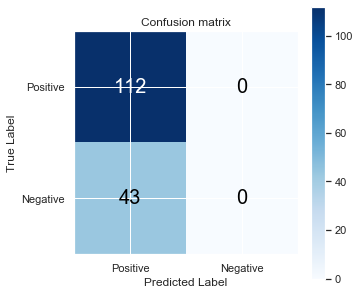

In [16]:
from sklearn.naive_bayes import BernoulliNB

my_classifier(BernoulliNB, Xtrain_m1, ytrain, Xtest_m1, ytest)
my_classifier(BernoulliNB, Xtrain_m2, ytrain, Xtest_m2, ytest)

              precision    recall  f1-score   support

    Positive       0.91      0.94      0.92       112
    Negative       0.82      0.74      0.78        43

    accuracy                           0.88       155
   macro avg       0.86      0.84      0.85       155
weighted avg       0.88      0.88      0.88       155

Recall: 0.74
Accuracy: 0.88
Precision: 0.82
F1 Score: 0.78
Confusion matrix, without normalization


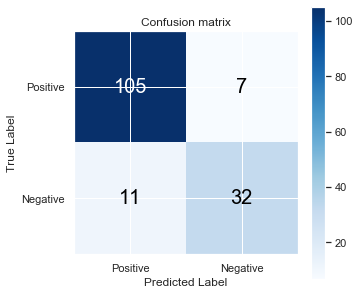

              precision    recall  f1-score   support

    Positive       0.83      0.96      0.89       112
    Negative       0.84      0.49      0.62        43

    accuracy                           0.83       155
   macro avg       0.84      0.73      0.76       155
weighted avg       0.83      0.83      0.82       155

Recall: 0.49
Accuracy: 0.83
Precision: 0.84
F1 Score: 0.62
Confusion matrix, without normalization


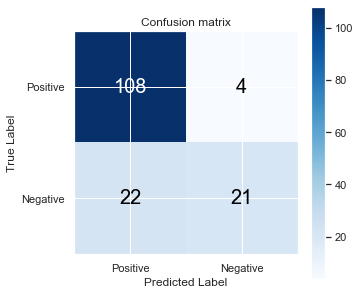

In [17]:
from sklearn.naive_bayes import MultinomialNB

my_classifier(MultinomialNB, Xtrain_m1, ytrain, Xtest_m1, ytest)
my_classifier(MultinomialNB, Xtrain_m2, ytrain, Xtest_m2, ytest)

### Comments

* The Naive Bayes models perform better than the Logistic Regression except for the BernoulliNB which performs poorly when used with the Matrix 2. 
* The MultinomialNB used with the Matrix 1 performs better of all the models. It has the highest precision for the positive class and the highest recall for the negative class.

## Question 5 ##

Up to this point, we've been using Count Vectorizer to create document-term matrices to input into the models. For at least one of the four models you've created so far, use TF-IDF Vectorizer instead of Count Vectorizer, and see if it improves the results.

Out of all of the models you've created, which model do you think best classifies positive and negative cappuccino cup reviews?

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

#matrix 1
tfidf_m1 = TfidfVectorizer(stop_words='english')
Xtrain_m1_tfidf = tfidf_m1.fit_transform(Xtrain).toarray()
Xtest_m1_tfidf = tfidf_m1.transform(Xtest).toarray()

#matrix 2
tfidf_m2 = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
Xtrain_m2_tfidf = tfidf_m2.fit_transform(Xtrain).toarray()
Xtest_m2_tfidf = tfidf_m2.transform(Xtest).toarray()

<class 'sklearn.linear_model.logistic.LogisticRegression'>
              precision    recall  f1-score   support

    Positive       0.76      0.99      0.86       112
    Negative       0.88      0.16      0.27        43

    accuracy                           0.76       155
   macro avg       0.82      0.58      0.57       155
weighted avg       0.79      0.76      0.70       155

Recall: 0.16
Accuracy: 0.76
Precision: 0.88
F1 Score: 0.27
Confusion matrix, without normalization


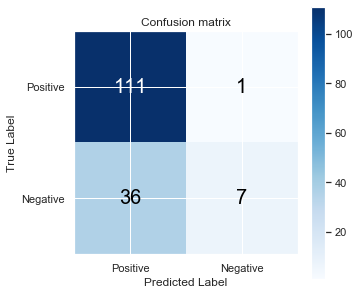

              precision    recall  f1-score   support

    Positive       0.73      1.00      0.84       112
    Negative       1.00      0.02      0.05        43

    accuracy                           0.73       155
   macro avg       0.86      0.51      0.44       155
weighted avg       0.80      0.73      0.62       155

Recall: 0.02
Accuracy: 0.73
Precision: 1.00
F1 Score: 0.05
Confusion matrix, without normalization


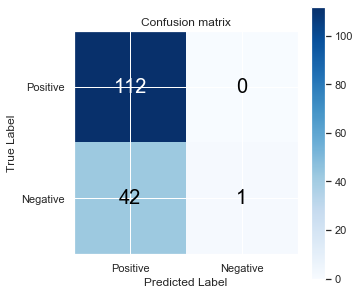

<class 'sklearn.naive_bayes.BernoulliNB'>
              precision    recall  f1-score   support

    Positive       0.76      0.98      0.86       112
    Negative       0.82      0.21      0.33        43

    accuracy                           0.77       155
   macro avg       0.79      0.60      0.60       155
weighted avg       0.78      0.77      0.71       155

Recall: 0.21
Accuracy: 0.77
Precision: 0.82
F1 Score: 0.33
Confusion matrix, without normalization


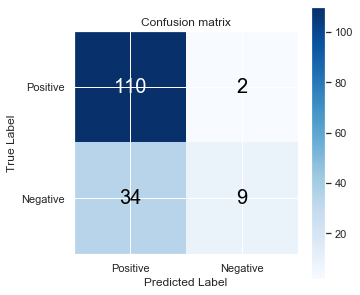

              precision    recall  f1-score   support

    Positive       0.72      1.00      0.84       112
    Negative       0.00      0.00      0.00        43

    accuracy                           0.72       155
   macro avg       0.36      0.50      0.42       155
weighted avg       0.52      0.72      0.61       155

Recall: 0.00
Accuracy: 0.72
Precision: 0.00
F1 Score: 0.00
Confusion matrix, without normalization


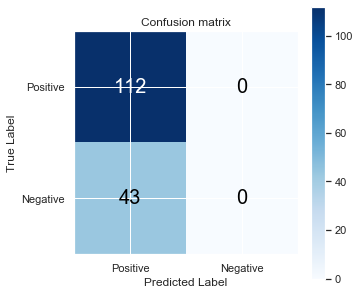

<class 'sklearn.naive_bayes.MultinomialNB'>
              precision    recall  f1-score   support

    Positive       0.73      1.00      0.85       112
    Negative       1.00      0.05      0.09        43

    accuracy                           0.74       155
   macro avg       0.87      0.52      0.47       155
weighted avg       0.81      0.74      0.64       155

Recall: 0.05
Accuracy: 0.74
Precision: 1.00
F1 Score: 0.09
Confusion matrix, without normalization


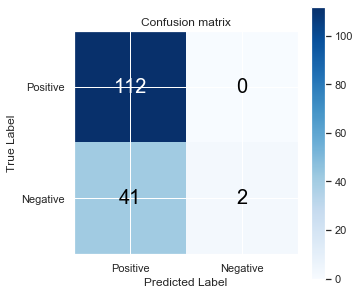

              precision    recall  f1-score   support

    Positive       0.72      1.00      0.84       112
    Negative       0.00      0.00      0.00        43

    accuracy                           0.72       155
   macro avg       0.36      0.50      0.42       155
weighted avg       0.52      0.72      0.61       155

Recall: 0.00
Accuracy: 0.72
Precision: 0.00
F1 Score: 0.00
Confusion matrix, without normalization


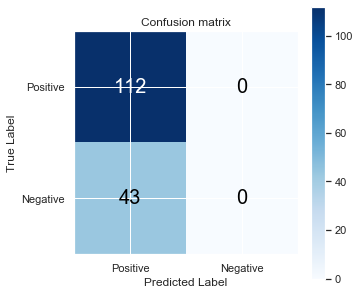

In [19]:
for model in [LogisticRegression, BernoulliNB, MultinomialNB]:
    print(str(model))
    my_classifier(model, Xtrain_m1_tfidf, ytrain, Xtest_m1_tfidf, ytest)
    my_classifier(model, Xtrain_m2_tfidf, ytrain, Xtest_m2_tfidf, ytest)

### Comment

* Tfidf Vectorizer worsens the predictions
* Tfidf Vectorizer with ngram range (1, 2) performs even poorer than that w single ngram. 
* Bernoulli with Tfidf single ngram performs the best of all the models. 